# CSCI 5980 MultiCoNER II - error analysis
Asal, Ku, London, Josh

## imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# import os # os.scandir
from collections import Counter
# import pandas as pd # not used
# from tqdm import tqdm
# import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## define files

In [ ]:
path = '/content/drive/Shareddrives/CSCI 5980-01 F22/predictions and differences/'

diff_files = [
  'base_en_20.diff',
  'base_en-full_20.diff',
  'base_en-melm_20.diff',
  'base_en-partial_20.diff',
  'base_en-stable-full_20.diff',
  'base_en-stable-partial_20.diff',
  'base_fr_20.diff',
  'base_fr-full_20.diff',
  'base_fr-melm_20.diff',
  'base_fr-partial_20.diff',
  'base_fr-stable-full_20.diff',
  'base_fr-stable-partial_20.diff',
]

In [ ]:
with open(path + 'base_en_20.conll') as file:
  for line in file:
    print(line, end='')

In [ ]:
with open(path + 'base_en_20.diff') as file:
  for line in file:
    print(line, end='')

## process files, find what's most meaningful

In [ ]:
def get_counter_from_diff(diff_file):
  real = []
  real_combined = []
  pred = []
  pred_combined = []
  # just for mistakes
  real_mistake_combined = []
  pred_mistake_combined = []

  counter_correct = Counter()
  counter_different = Counter()

  # same except don't distinguish between B- and I-
  counter_correct_combined = Counter()
  counter_different_combined = Counter()

  # same except don't care about order of tag mismatch - not used
  counter_correct_unordered = Counter() # no meaning, they're the same - unused
  counter_different_unordered = Counter()

  # both of the above
  counter_different_combined_unordered = Counter()

  # only care about each individual tag
  counter_correct_individual = Counter()
  counter_different_individual = Counter()

  counter_correct_individual_combined = Counter()
  counter_different_individual_combined = Counter()

  with open(diff_file) as file:
    for line in file:
      line = line.split()
      if (len(line) == 0) or (line[0] == '#'): # empty lines and headers
        continue

      real.append(line[1])
      real_combined.append(line[1][2:])
      pred.append(line[2])
      pred_combined.append(line[2][2:])

      # correctly predicted
      if line[1] == line[2]:
        counter_correct[ line[1] ] += 1
        counter_correct_combined[ line[1][2:] ] += 1
      
      # incorrectly predicted
      else: # line[1] != line[2]
        counter_different[ (line[1], line[2]) ] += 1
        counter_different_combined[ (line[1][2:], line[2][2:]) ] += 1

        real_mistake_combined.append(line[1][2:])
        pred_mistake_combined.append(line[2][2:])

        # unordered
        if line[1] < line[2]:
          counter_different_unordered[ (line[1], line[2]) ] += 1
        else: # line[1] > line[2]
          counter_different_unordered[ (line[2], line[1]) ] += 1

        # combined unordered
        if line[1][2:] < line[2][2:]:
          counter_different_combined_unordered[ (line[1][2:], line[2][2:]) ] += 1
        else: # line[1][2:] > line[2][2:]
          counter_different_combined_unordered[ (line[2][2:], line[1][2:]) ] += 1

        # individual tags
        counter_different_individual[ line[1] ] += 1
        counter_different_individual[ line[2] ] += 1
        counter_different_individual_combined[ line[1][2:] ] += 1
        counter_different_individual_combined[ line[2][2:] ] += 1


  return (real, real_combined, pred, pred_combined,
          real_mistake_combined, pred_mistake_combined,
          counter_correct, counter_different, counter_correct_combined, counter_different_combined,
          counter_different_unordered, counter_different_combined_unordered,
          counter_different_individual, counter_different_individual_combined)

In [ ]:
(real, real_combined, pred, pred_combined,
 real_mistake_combined, pred_mistake_combined,
 pairs_same, pairs_diff, pairs_same_combined, pairs_diff_combined,
 pairs_diff_unordered, pairs_diff_combined_unordered,
 each_diff, each_diff_combined) = get_counter_from_diff(path + 'base_en_20.diff')

In [ ]:
pairs_same.most_common(20)

[('O', 10363),
 ('I-Artist', 188),
 ('B-Artist', 179),
 ('I-VisualWork', 88),
 ('B-HumanSettlement', 86),
 ('I-ORG', 76),
 ('I-WrittenWork', 74),
 ('I-MusicalWork', 70),
 ('I-OtherPER', 68),
 ('B-Athlete', 60),
 ('I-HumanSettlement', 60),
 ('I-Athlete', 59),
 ('B-OtherPER', 45),
 ('B-ORG', 44),
 ('I-Facility', 42),
 ('B-WrittenWork', 40),
 ('B-VisualWork', 38),
 ('B-MusicalWork', 37),
 ('B-Facility', 33),
 ('I-SportsGRP', 32)]

In [ ]:
pairs_diff.most_common(20)

[(('I-OtherPER', 'I-Artist'), 19),
 (('B-OtherPROD', 'O'), 18),
 (('I-VisualWork', 'O'), 17),
 (('B-OtherPER', 'B-Artist'), 16),
 (('I-ORG', 'O'), 15),
 (('I-OtherPROD', 'O'), 14),
 (('I-MusicalWork', 'O'), 14),
 (('I-Artist', 'I-OtherPER'), 14),
 (('B-ORG', 'O'), 14),
 (('I-Politician', 'I-Artist'), 13),
 (('B-Artist', 'B-OtherPER'), 13),
 (('I-OtherPER', 'I-Politician'), 12),
 (('B-OtherPER', 'B-Athlete'), 12),
 (('I-OtherPER', 'I-Athlete'), 12),
 (('B-Politician', 'B-Artist'), 12),
 (('B-VisualWork', 'O'), 12),
 (('O', 'I-WrittenWork'), 11),
 (('B-Politician', 'B-OtherPER'), 10),
 (('I-Politician', 'I-OtherPER'), 10),
 (('B-OtherPER', 'B-Politician'), 9)]

In [ ]:
pairs_same_combined.most_common(20)

[('', 10363),
 ('Artist', 367),
 ('HumanSettlement', 146),
 ('VisualWork', 126),
 ('ORG', 120),
 ('Athlete', 119),
 ('WrittenWork', 114),
 ('OtherPER', 113),
 ('MusicalWork', 107),
 ('Facility', 75),
 ('SportsGRP', 59),
 ('Politician', 50),
 ('MusicalGRP', 50),
 ('OtherPROD', 33),
 ('Station', 32),
 ('Software', 24),
 ('OtherLOC', 24),
 ('PublicCorp', 22),
 ('Vehicle', 20),
 ('ArtWork', 17)]

In [ ]:
pairs_diff_combined.most_common(20)

[(('OtherPER', 'Artist'), 35),
 (('OtherPROD', ''), 32),
 (('VisualWork', ''), 29),
 (('ORG', ''), 29),
 (('Artist', 'OtherPER'), 27),
 (('Politician', 'Artist'), 26),
 (('OtherPER', 'Politician'), 25),
 (('OtherPER', 'Athlete'), 25),
 (('MusicalWork', ''), 23),
 (('Politician', 'OtherPER'), 20),
 (('', 'WrittenWork'), 19),
 (('', 'VisualWork'), 17),
 (('Disease', ''), 17),
 (('', 'MusicalWork'), 16),
 (('', 'Artist'), 15),
 (('WrittenWork', ''), 14),
 (('Athlete', 'Artist'), 14),
 (('Software', 'VisualWork'), 14),
 (('', 'Facility'), 13),
 (('PublicCorp', 'ORG'), 13)]

In [ ]:
pairs_diff_unordered.most_common(20)

[(('I-Artist', 'I-OtherPER'), 33),
 (('B-Artist', 'B-OtherPER'), 29),
 (('I-VisualWork', 'O'), 26),
 (('B-OtherPROD', 'O'), 24),
 (('I-OtherPER', 'I-Politician'), 22),
 (('I-MusicalWork', 'O'), 22),
 (('I-ORG', 'O'), 21),
 (('B-ORG', 'O'), 20),
 (('B-VisualWork', 'O'), 20),
 (('B-OtherPER', 'B-Politician'), 19),
 (('I-OtherPROD', 'O'), 19),
 (('I-Artist', 'I-Politician'), 18),
 (('I-WrittenWork', 'O'), 18),
 (('B-MusicalWork', 'O'), 17),
 (('I-Athlete', 'I-OtherPER'), 16),
 (('B-Artist', 'B-Politician'), 16),
 (('B-Athlete', 'B-OtherPER'), 15),
 (('B-WrittenWork', 'O'), 15),
 (('B-HumanSettlement', 'O'), 14),
 (('B-Disease', 'O'), 13)]

In [ ]:
pairs_diff_combined_unordered.most_common(20)

[(('Artist', 'OtherPER'), 62),
 (('', 'VisualWork'), 46),
 (('OtherPER', 'Politician'), 45),
 (('', 'OtherPROD'), 43),
 (('', 'ORG'), 41),
 (('', 'MusicalWork'), 39),
 (('Artist', 'Politician'), 36),
 (('', 'WrittenWork'), 33),
 (('Athlete', 'OtherPER'), 32),
 (('', 'Facility'), 24),
 (('', 'Disease'), 24),
 (('', 'HumanSettlement'), 20),
 (('', 'Artist'), 18),
 (('MusicalWork', 'VisualWork'), 18),
 (('', 'AnatomicalStructure'), 18),
 (('', 'ArtWork'), 17),
 (('OtherPER', 'Scientist'), 16),
 (('Artist', 'Athlete'), 16),
 (('ORG', 'PublicCorp'), 16),
 (('Software', 'VisualWork'), 15)]

In [ ]:
each_diff.most_common(20)

[('O', 481),
 ('B-Artist', 105),
 ('I-Artist', 102),
 ('I-OtherPER', 100),
 ('B-OtherPER', 87),
 ('B-ORG', 76),
 ('I-VisualWork', 74),
 ('I-Politician', 61),
 ('I-ORG', 61),
 ('B-Politician', 58),
 ('B-VisualWork', 53),
 ('B-OtherPROD', 51),
 ('I-MusicalWork', 51),
 ('I-Facility', 48),
 ('B-Facility', 46),
 ('B-Athlete', 45),
 ('B-MusicalWork', 44),
 ('I-Athlete', 42),
 ('B-MusicalGRP', 42),
 ('I-WrittenWork', 42)]

In [ ]:
each_diff_combined.most_common(20)

[('', 481),
 ('Artist', 207),
 ('OtherPER', 187),
 ('ORG', 137),
 ('VisualWork', 127),
 ('Politician', 119),
 ('MusicalWork', 95),
 ('Facility', 94),
 ('Athlete', 87),
 ('OtherPROD', 86),
 ('MusicalGRP', 82),
 ('WrittenWork', 78),
 ('HumanSettlement', 61),
 ('Software', 48),
 ('Scientist', 47),
 ('PublicCorp', 42),
 ('SportsGRP', 36),
 ('Disease', 36),
 ('ArtWork', 32),
 ('Vehicle', 30)]

## confusion matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
# confusion_matrix creates the matrix in the order the classes appear in y_true

confusion_matrix(real, pred).shape

(67, 67)

In [ ]:
confusion_matrix(real_combined, pred_combined).shape

(34, 34)

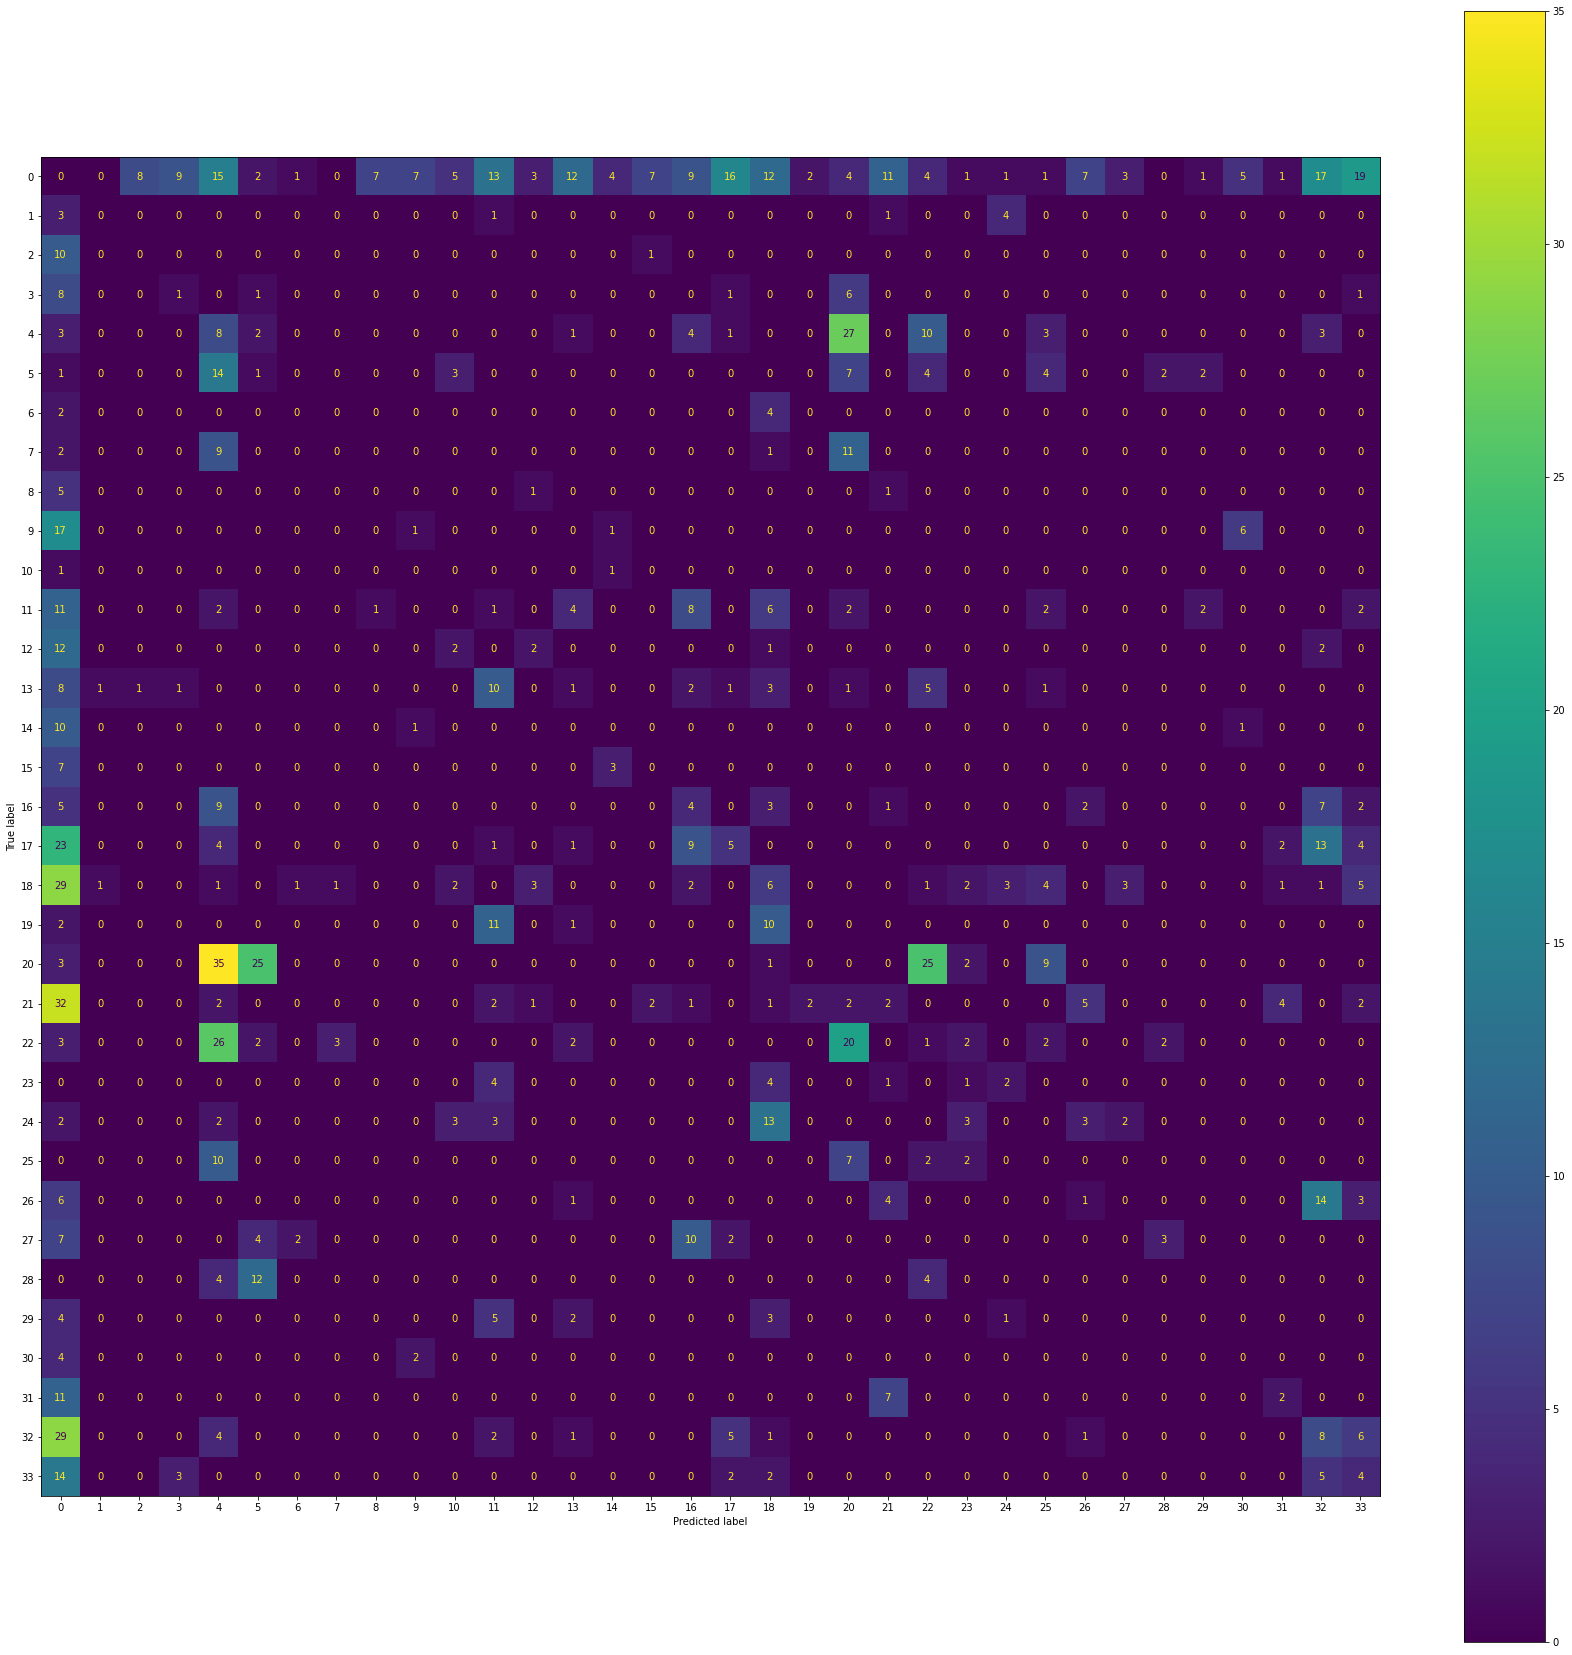

In [ ]:
plt.rcParams['figure.figsize'] = (30,30)

cm = confusion_matrix(real_mistake_combined, pred_mistake_combined) # , normalize='true') # , labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # , display_labels=clf.classes_)
disp.plot()
plt.show()

## process all files

base_en_20.diff
~~~pairs
(('Artist', 'OtherPER'), 62)
(('', 'VisualWork'), 46)
(('OtherPER', 'Politician'), 45)
(('', 'OtherPROD'), 43)
(('', 'ORG'), 41)
(('', 'MusicalWork'), 39)
(('Artist', 'Politician'), 36)
(('', 'WrittenWork'), 33)
(('Athlete', 'OtherPER'), 32)
(('', 'Facility'), 24)
~~~each
('', 481)
('Artist', 207)
('OtherPER', 187)
('ORG', 137)
('VisualWork', 127)
('Politician', 119)
('MusicalWork', 95)
('Facility', 94)
('Athlete', 87)
('OtherPROD', 86)


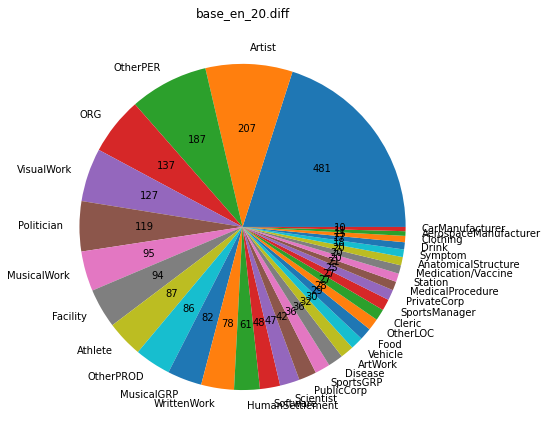


base_en-full_20.diff
~~~pairs
(('Artist', 'OtherPER'), 66)
(('', 'MusicalWork'), 63)
(('OtherPER', 'Politician'), 55)
(('', 'OtherPROD'), 46)
(('', 'WrittenWork'), 44)
(('', 'VisualWork'), 41)
(('', 'ORG'), 38)
(('Athlete', 'OtherPER'), 37)
(('Artist', 'Politician'), 31)
(('', 'HumanSettlement'), 28)
~~~each
('', 561)
('OtherPER', 212)
('Artist', 199)
('ORG', 136)
('VisualWork', 124)
('Politician', 118)
('MusicalWork', 113)
('Athlete', 99)
('WrittenWork', 86)
('HumanSettlement', 77)


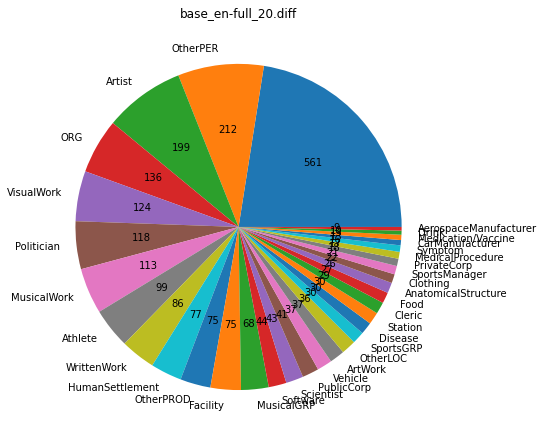


base_en-melm_20.diff
~~~pairs
(('Artist', 'OtherPER'), 74)
(('OtherPER', 'Politician'), 58)
(('Artist', 'Politician'), 58)
(('', 'WrittenWork'), 42)
(('', 'VisualWork'), 42)
(('Athlete', 'OtherPER'), 40)
(('', 'MusicalWork'), 39)
(('', 'ORG'), 37)
(('', 'OtherPROD'), 37)
(('', 'Facility'), 30)
~~~each
('', 489)
('Artist', 253)
('OtherPER', 229)
('Politician', 175)
('ORG', 160)
('VisualWork', 148)
('MusicalWork', 111)
('Athlete', 101)
('OtherPROD', 100)
('WrittenWork', 98)


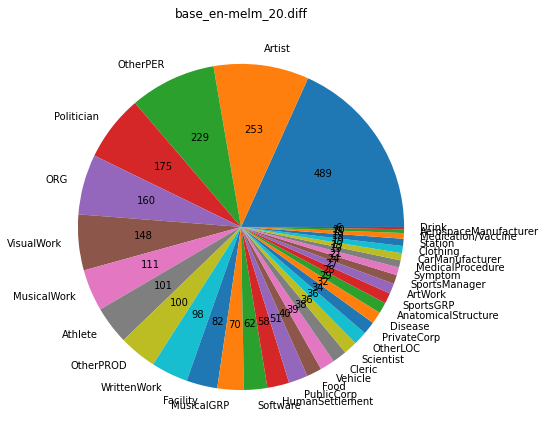


base_en-partial_20.diff
~~~pairs
(('Artist', 'OtherPER'), 72)
(('OtherPER', 'Politician'), 56)
(('', 'ORG'), 54)
(('', 'VisualWork'), 54)
(('', 'OtherPROD'), 49)
(('Athlete', 'OtherPER'), 37)
(('Artist', 'Athlete'), 36)
(('', 'WrittenWork'), 34)
(('', 'MusicalWork'), 33)
(('', 'Facility'), 25)
~~~each
('', 541)
('OtherPER', 226)
('Artist', 209)
('ORG', 150)
('VisualWork', 132)
('Athlete', 115)
('MusicalWork', 106)
('Politician', 103)
('OtherPROD', 93)
('Facility', 81)


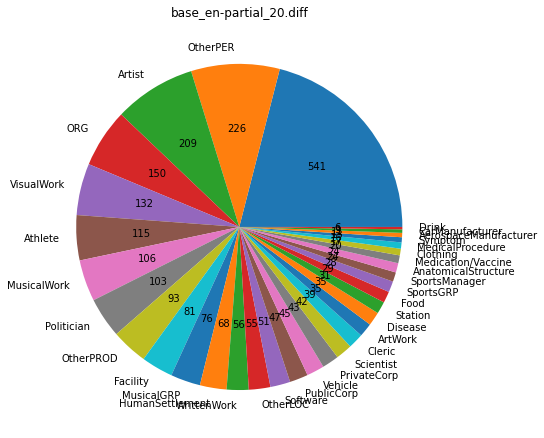


base_en-stable-full_20.diff
~~~pairs
(('Artist', 'OtherPER'), 108)
(('OtherPER', 'Politician'), 61)
(('', 'ORG'), 43)
(('', 'WrittenWork'), 38)
(('', 'OtherPROD'), 35)
(('', 'VisualWork'), 33)
(('', 'Artist'), 30)
(('', 'MusicalWork'), 30)
(('OtherPER', 'Scientist'), 28)
(('Software', 'VisualWork'), 28)
~~~each
('', 483)
('OtherPER', 263)
('Artist', 235)
('ORG', 143)
('VisualWork', 110)
('Politician', 105)
('MusicalWork', 104)
('Athlete', 89)
('OtherPROD', 81)
('MusicalGRP', 81)


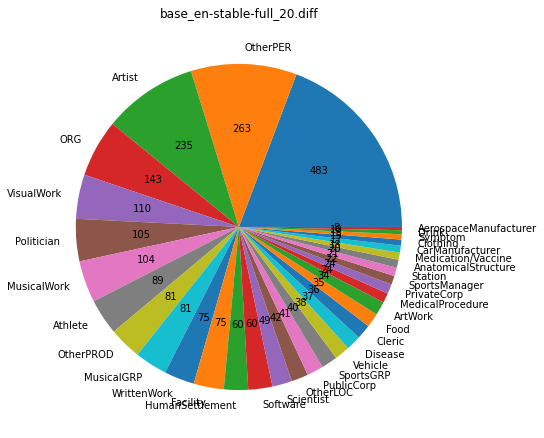


base_en-stable-partial_20.diff
~~~pairs
(('Artist', 'OtherPER'), 63)
(('OtherPER', 'Politician'), 59)
(('', 'VisualWork'), 53)
(('', 'ORG'), 44)
(('', 'WrittenWork'), 44)
(('Athlete', 'OtherPER'), 42)
(('', 'OtherPROD'), 42)
(('', 'MusicalWork'), 38)
(('Artist', 'Politician'), 35)
(('Artist', 'Athlete'), 34)
~~~each
('', 517)
('Artist', 228)
('OtherPER', 224)
('ORG', 166)
('VisualWork', 129)
('Politician', 114)
('Athlete', 112)
('OtherPROD', 92)
('MusicalWork', 90)
('WrittenWork', 83)


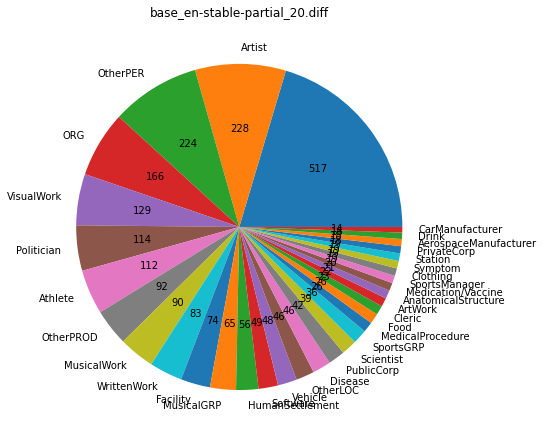


base_fr_20.diff
~~~pairs
(('Artist', 'OtherPER'), 88)
(('', 'WrittenWork'), 73)
(('OtherPER', 'Politician'), 60)
(('', 'VisualWork'), 41)
(('', 'ORG'), 40)
(('', 'Facility'), 34)
(('', 'HumanSettlement'), 29)
(('Athlete', 'OtherPER'), 28)
(('Artist', 'Athlete'), 26)
(('', 'ArtWork'), 25)
~~~each
('', 463)
('OtherPER', 259)
('Artist', 193)
('Politician', 118)
('WrittenWork', 115)
('ORG', 111)
('VisualWork', 98)
('Facility', 98)
('Athlete', 83)
('HumanSettlement', 75)


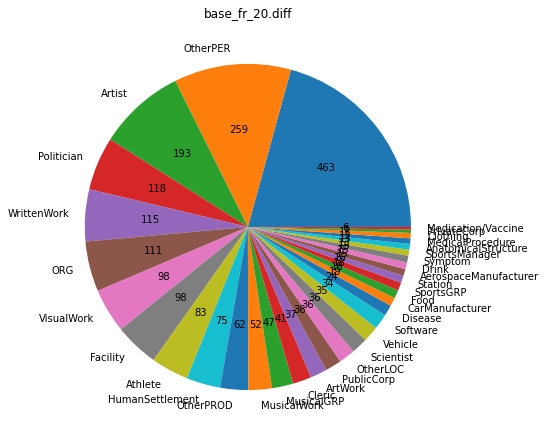


base_fr-full_20.diff
~~~pairs
(('Artist', 'OtherPER'), 112)
(('', 'WrittenWork'), 96)
(('OtherPER', 'Politician'), 63)
(('', 'ORG'), 55)
(('', 'VisualWork'), 54)
(('Athlete', 'OtherPER'), 47)
(('', 'OtherPROD'), 39)
(('', 'ArtWork'), 32)
(('', 'Facility'), 28)
(('OtherPER', 'Scientist'), 24)
~~~each
('', 519)
('OtherPER', 310)
('Artist', 185)
('ORG', 144)
('WrittenWork', 139)
('Politician', 121)
('VisualWork', 99)
('HumanSettlement', 90)
('Athlete', 77)
('OtherPROD', 75)


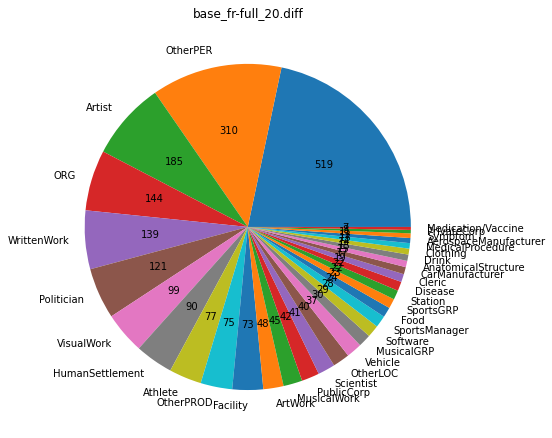


base_fr-melm_20.diff
~~~pairs
(('', 'WrittenWork'), 74)
(('Artist', 'OtherPER'), 72)
(('OtherPER', 'Politician'), 54)
(('', 'ORG'), 53)
(('', 'VisualWork'), 47)
(('Athlete', 'OtherPER'), 39)
(('', 'HumanSettlement'), 36)
(('Artist', 'Politician'), 30)
(('', 'ArtWork'), 27)
(('', 'Artist'), 26)
~~~each
('', 490)
('OtherPER', 257)
('Artist', 213)
('Politician', 155)
('ORG', 143)
('WrittenWork', 116)
('HumanSettlement', 111)
('Facility', 99)
('Athlete', 96)
('VisualWork', 88)


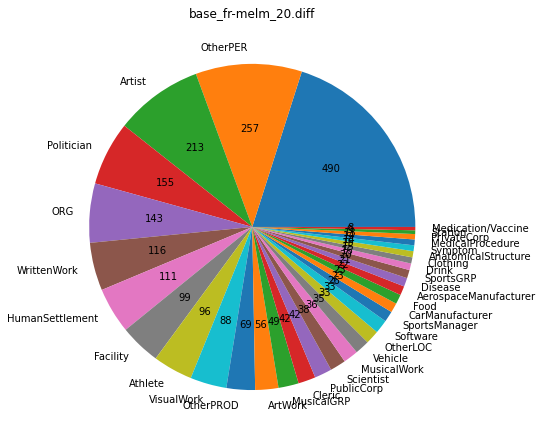


base_fr-partial_20.diff
~~~pairs
(('', 'ORG'), 80)
(('', 'WrittenWork'), 73)
(('OtherPER', 'Politician'), 55)
(('Artist', 'OtherPER'), 45)
(('', 'ArtWork'), 38)
(('', 'VisualWork'), 30)
(('OtherPER', 'Scientist'), 30)
(('', 'HumanSettlement'), 29)
(('Artist', 'Politician'), 27)
(('Athlete', 'OtherPER'), 27)
~~~each
('', 510)
('OtherPER', 215)
('Artist', 158)
('ORG', 145)
('Politician', 123)
('WrittenWork', 115)
('Athlete', 86)
('VisualWork', 84)
('HumanSettlement', 84)
('Facility', 69)


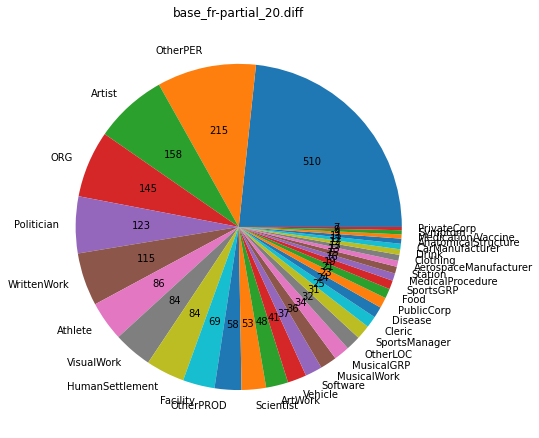


base_fr-stable-full_20.diff
~~~pairs
(('', 'WrittenWork'), 87)
(('OtherPER', 'Politician'), 65)
(('Artist', 'OtherPER'), 54)
(('', 'ORG'), 48)
(('', 'HumanSettlement'), 36)
(('Artist', 'Politician'), 35)
(('', 'VisualWork'), 34)
(('OtherPER', 'Scientist'), 30)
(('', 'Facility'), 30)
(('Artist', 'Athlete'), 28)
~~~each
('', 517)
('OtherPER', 224)
('Artist', 177)
('Politician', 159)
('WrittenWork', 126)
('ORG', 115)
('HumanSettlement', 99)
('Athlete', 81)
('Facility', 81)
('VisualWork', 78)


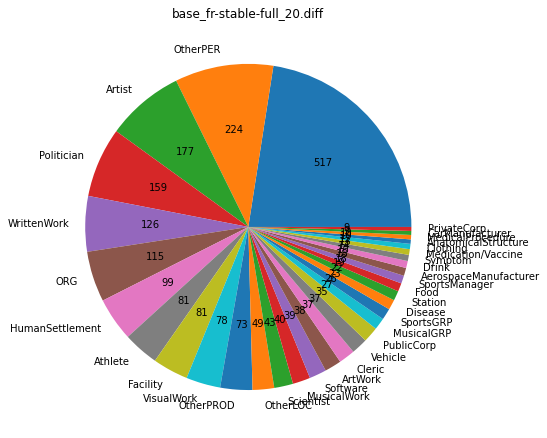


base_fr-stable-partial_20.diff
~~~pairs
(('', 'WrittenWork'), 81)
(('Artist', 'OtherPER'), 64)
(('OtherPER', 'Politician'), 53)
(('', 'VisualWork'), 48)
(('', 'ORG'), 48)
(('Artist', 'Politician'), 32)
(('', 'ArtWork'), 31)
(('Athlete', 'OtherPER'), 29)
(('Artist', 'Athlete'), 28)
(('', 'HumanSettlement'), 26)
~~~each
('', 444)
('OtherPER', 206)
('Artist', 184)
('Politician', 127)
('WrittenWork', 124)
('ORG', 113)
('Athlete', 102)
('VisualWork', 92)
('HumanSettlement', 84)
('Facility', 81)


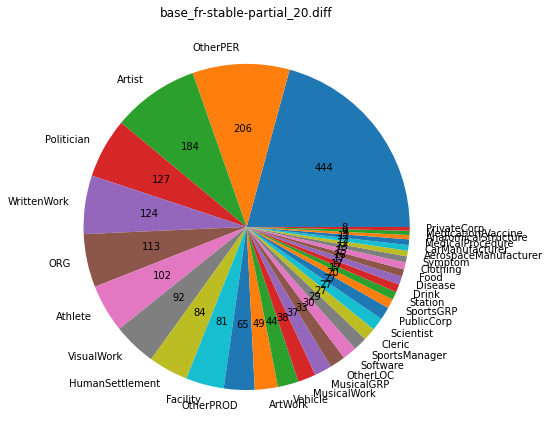

In [ ]:
plt.rcParams['figure.figsize'] = (7.5,7.5)

for file in diff_files:
  (real, real_combined, pred, pred_combined,
   real_mistake_combined, pred_mistake_combined,
   pairs_same, pairs_diff, pairs_same_combined, pairs_diff_combined,
   pairs_diff_unordered, pairs_diff_combined_unordered,
   each_diff, each_diff_combined) = get_counter_from_diff(path + file)
  
  print(file)
  print('~~~pairs')
  print(*pairs_diff_combined_unordered.most_common(10), sep='\n')
  print('~~~each')
  print(*each_diff_combined.most_common(10), sep='\n')

  keys = [key for (key, val) in each_diff_combined.most_common()]
  values = [val for (key, val) in each_diff_combined.most_common()]

  plt.title(file)
  plt.pie(x=values, labels=keys, autopct= lambda x: '{val:.0f}'.format(val=x*sum(values)/100) )
  # autopct= lambda x: '{pct:.2f}% ({val:.0f})'.format(pct=x, val=x*sum(values)/100)
  plt.show()

  print()